# TME 4 : Suffix Trees


## Recheche de pattern (motifs) en utilisant les suffix trees

Nous allons utiliser l'algorithme suffix-tree pour une recherche rapide et éfficace de motifs. Un suffix-tree est construit à partir d'un jeux de séquences, ensuite nous pouvons rechercher le motif en temps O(k) où k est la longueur du motif.

1\. Nous allons réutiliser les fonctions du TMEs precedents pour générer ``t`` séquences artificielles de taille ``n``, et implanter dans chaque séquence un motif de taille ``k`` à des positions aléatoires avec ``v`` substitutions choisies aléatoirement. Cependant, les ``t`` séquences artificielles initiales (sans implantation) ainsi que le motif initial (sans variation/mutation) doivent être générées une seule fois. Ensuite, selon chaque question, nous introduisons des différentes variation au motif initial et les implantons dans les séquences initiales afin de générer des nouveau jeux de données. 

In [1]:
import random
import numpy as np

nuc = ('A', 'C', 'G', 'T')

k=8 #taille de motif
v=0 #nb de positions variables dans le motif
t=5 #nb de sequences
n=100 #longuer des sequence
f=0.9


1.1\. Generer les séquences artificielles initiales et implanter un motif (sans variation, v=0)

In [2]:

def insertMotif(sequence, motif, position):
    return sequence[:position] + motif + sequence[position:]

def generateRandomSequence(n, upper=True):
    """
    Génère une séquence nucléotidique aléatoire 
    entrée n : longueur de la sequence
    entrée upper : bool, si True les nucléotides seront en majuscule, False minuscule
    sortie sequence : une séquence nucléotidique aléatoire 
    """
    sequence = ""
    for i in range (n):
        s=random.choice(nuc)
        if(upper):
            sequence=sequence+(s.upper())
        else:
            sequence=sequence+(s.lower())
    
    return sequence

def modifierMotif(motif, nbpos,  upper=True):
    """
    Modifie nbpos positions d'un motif aléatoirement 
    entrée motif: motif à modifier
    entrée nbpos: nombre de positions
    entrée upper : bool, si True les nucléotides modifiés seront majuscule, False minuscule
    sortie motifM: motif modifié
    """
    motifM = list(motif)
    #print(motif)
    for i in range(0,nbpos):
        t=random.randint(0,len(motifM)-1)
        while (i>0 and t==prec): #pour verifier qu'on ne s'occupe pas d'une même position 2 fois de suite
            t=random.randint(0,len(motifM)-1)
            
        s=random.choice(nuc)
        #print(s==motifM[t].upper())
        while (s==motifM[t].upper()): #pour verifier qu'on ne substitue pas par la même lettre
            s=random.choice(nuc)
        
        if (upper==True):
            motifM=motifM[:t]+[s.upper()]+motifM[t+1:]
        else:
            motifM=motifM[:t]+[s.lower()]+motifM[t+1:]
        prec=t
    
    #print(motifM)
    return "".join(motifM)

#tester la fonction modifierMotif
#print (modifierMotif("acg", 2))


def implantMotifVar(k, v, t, n, f):
    """
    Génère des séquences aléatoires et les implante des motifs variables (un motif par séquence)
    entrée k: taille du motif
    entrée v: nombre de variations
    entrée t : nombre de séquences 
    entrée n : longueur des séquences
    entrée f : frequence de variation du motif.
    sortie DNA : matrice de dimension txn avec les motifs implantés
    REMARQUE : La taille totale des séquences plus motif doit être égal à t, pensez à générer de séquence aléatoire de taille t-k pour pouvoir implanter un motif de taille k
    """
    sequences = []
    for i in range(0,t):
        if(random.uniform(0.0, 1.0)<=f):
            pos=random.randint(0,n)
            sequences.append(insertMotif(generateRandomSequence(n-k,False),modifierMotif(generateRandomSequence(k,False),v),pos))
        else:
            sequences.append(generateRandomSequence(n,False))
    return sequences

adn = implantMotifVar(k, v, t, n, f)
print (adn)

adn  = [s.upper() for s in adn]
print (adn)


['ccctggctgccgattttataccgtttcaggcctacattgcataccccccgcgattatggtgcctgtcaaagtcggcactagctctgtctgccgagcgagt', 'tgggggttcgccgcgtcaccaatgcagaacattgatgcagtggcctcccctcgtgtgacgtcgcctctacttgattcgggttacctcagacggcctgctt', 'gttctgacccctccaatttgcctgtccttgatgcacacccgcgtgggtgtcttcaataattgtcccacctgccttgaatgagggagggacacttcctaac', 'tatgagagaacagtcctaaaatatatgcaatcccttggcgccttagaaacatcggtccggcatttagaatatccaggtgatatgacaaacctatccgcag', 'gactcccgttgactttatcgaggccatagtcatgacttttcacaggatatggcctaaacattctcaagacgcaggtaggggccatcaccatccccagggc']
['CCCTGGCTGCCGATTTTATACCGTTTCAGGCCTACATTGCATACCCCCCGCGATTATGGTGCCTGTCAAAGTCGGCACTAGCTCTGTCTGCCGAGCGAGT', 'TGGGGGTTCGCCGCGTCACCAATGCAGAACATTGATGCAGTGGCCTCCCCTCGTGTGACGTCGCCTCTACTTGATTCGGGTTACCTCAGACGGCCTGCTT', 'GTTCTGACCCCTCCAATTTGCCTGTCCTTGATGCACACCCGCGTGGGTGTCTTCAATAATTGTCCCACCTGCCTTGAATGAGGGAGGGACACTTCCTAAC', 'TATGAGAGAACAGTCCTAAAATATATGCAATCCCTTGGCGCCTTAGAAACATCGGTCCGGCATTTAGAATATCCAGGTGATATGACAAACCTATCCGCAG', 'GACTCCCGTTGACTTTATCGAGGCCATAGTCATGACTTTTCACAGGATATGGCCTAAACAT

2\. Définissez une fonction ``construct_tree`` pour construire un suffix tree à partir des séquences artificielles (après implantation) en utilisant le python package suffix-trees trouvable ici: https://pypi.org/project/suffix-trees/. Tester si votre fonction est capable de trouver le motif sans variation implanté.

In [3]:
!pip install suffix-trees

In [4]:
from suffix_trees import STree

st = STree.STree("abcdefghab")
print(st.find("abc")) # 0
print(st.find_all("ab")) # [0, 8]

def construct_tree(sequences):
    """
    construire un abre de suffixe
    entrée1 : matrice de dimension txn avec les sequences
    sortie1 : arbre de suffixe
    REMARK: Vous devez concatener toutes les sequences de la matrice avant d'appeller la fonction STree
    """
    text = ''
    for seq in sequences:
        text+=str(seq)
    st = STree.STree(text)
    return st

tree = construct_tree(adn)
fix_motif = 'CGAGCCA' #changer pour un teste rapide
print(tree.find_all(fix_motif))


0
{8, 0}
{}


3\. Avant de chercher les motifs, implémentez ou reutilisez les fonctions pour générer tous les motifs (k-mer) possibles de taille k, en éliminant les motifs peu complexe pour éviter les calculs inutiles.

In [5]:
def kmerList(allkmers):
    validKmers = []
    for i in allkmers:
        kmer = "".join(i)
        validKmers.append(kmer)
    return validKmers


def removeLowComplexe(motifs,k):
    motifsClean = []
    supp=False
    for key in motifs:
        for i in range(len(key)):
            cpt=key.count(key[i])
            if (cpt>=k):
                supp=True
            if ((i+3)<len(key)):
                if key[i]==key[i+2] and key[i+1]==key[i+3]:
                    supp=True
        if (supp==False):
            motifsClean.append(key)
        supp=False
    return motifsClean

from itertools import product
allkmers = product(nuc, repeat=k)
kmers = kmerList(allkmers)

print (len(kmers))
kmersValid = removeLowComplexe(kmers, 4)
print (len(kmersValid))
print (kmersValid[0])
#la fonction removeLowComplexePair a été retiré étant donnée qu'on l'a déjà intégré dans removeLowComplexe

65536
29688
AAACCCGG


4\. **Exact matching:** Définissez la fonction ``exact_match`` qui cherche dans le suffix tree tous les motifs possibles (k-mers), générés à la question precedent. La fonction renvoie un dictionnaire qui contient les motifs (clés) et leurs nombre d'occurrence (valeurs). Ce dictionnaire doit être trié par nombre d'occurrences. 

Ensuite, trouvez et affichez les 10 motifs plus fréquents dans notre jeux de données artificiels.

In [6]:
def exact_match(kmersV, stree):
    """
    Cherche dans le suffix tree tous les motifs possibles
    entrée1 kmersV: Liste de Kmers à chercher
    entrée2 stree: suffix tree
    sortie1 motif_occur_sorted: dictionnaire qui contient les motifs (clés) et leurs nombre d'occurrences (values).
    """
    motif_occur_sorted = {}
    motif_occur_sorte = {}

    for k in kmersV:
        if (stree.find(k)!={}):
            if not (k in motif_occur_sorted.keys()):
                motif_occur_sorted[k]=1
            else:
                motif_occur_sorted[k]+=1
    motifs= sorted(motif_occur_sorted, reverse=True, key=motif_occur_sorted.get)
    for k in motifs:
        motif_occur_sorte[k]=motif_occur_sorted[k]
    return motif_occur_sorte

st = construct_tree(adn)
print(adn)
res=exact_match(kmersValid, st)
print(res)
print("les 10 motifs plus fréquents:")
motifs= sorted(res.keys())
motifs=motifs[0:10]
print(motifs)
    



['CCCTGGCTGCCGATTTTATACCGTTTCAGGCCTACATTGCATACCCCCCGCGATTATGGTGCCTGTCAAAGTCGGCACTAGCTCTGTCTGCCGAGCGAGT', 'TGGGGGTTCGCCGCGTCACCAATGCAGAACATTGATGCAGTGGCCTCCCCTCGTGTGACGTCGCCTCTACTTGATTCGGGTTACCTCAGACGGCCTGCTT', 'GTTCTGACCCCTCCAATTTGCCTGTCCTTGATGCACACCCGCGTGGGTGTCTTCAATAATTGTCCCACCTGCCTTGAATGAGGGAGGGACACTTCCTAAC', 'TATGAGAGAACAGTCCTAAAATATATGCAATCCCTTGGCGCCTTAGAAACATCGGTCCGGCATTTAGAATATCCAGGTGATATGACAAACCTATCCGCAG', 'GACTCCCGTTGACTTTATCGAGGCCATAGTCATGACTTTTCACAGGATATGGCCTAAACATTCTCAAGACGCAGGTAGGGGCCATCACCATCCCCAGGGC']
{'AAACCCGG': 1, 'AAACCCGT': 1, 'AAACCCTG': 1, 'AAACCCTT': 1, 'AAACCGCT': 1, 'AAACCGGC': 1, 'AAACCGGG': 1, 'AAACCGGT': 1, 'AAACCGTC': 1, 'AAACCGTG': 1, 'AAACCGTT': 1, 'AAACCTCG': 1, 'AAACCTGC': 1, 'AAACCTGG': 1, 'AAACCTGT': 1, 'AAACCTTC': 1, 'AAACCTTG': 1, 'AAACCTTT': 1, 'AAACGCCG': 1, 'AAACGCCT': 1, 'AAACGCTC': 1, 'AAACGCTG': 1, 'AAACGCTT': 1, 'AAACGGCC': 1, 'AAACGGCG': 1, 'AAACGGCT': 1, 'AAACGGGC': 1, 'AAACGGGT': 1, 'AAACGGTC': 1, 'AAACGGTG': 1, 'AAACGGTT': 1, 'AAACGTCC': 1

5\. Introduisez deux variation (v=2) au motif initial. Pour cela avant de chaque implantation, créez d'abord un motif varié (avec v substitutions choisies aléatoirement) à partir du motif initial et puis implantez-le dans une séquence. Repetez pour chaque sequence dans le Jeux de donnée. Il suffit de mettre ``v`` égal ``2`` et réutiliser les fonctions définies à la question 1.

In [7]:
v=2
def implantMotif(adnOri, fix_motif, k, v, t, n):
   
    sequences = []
    for i in range(0,t):
        pos=random.randint(0,n)
        sequences.append(insertMotif(adnOri[i],modifierMotif(fix_motif,v),pos))
    return adnOri, sequences, fix_motif

adnOri=adn
adnOri, adn,  fix_motif = implantMotif(adnOri, fix_motif, k, v, t, n)
print(adnOri)
print(adn)
print(fix_motif)


['CCCTGGCTGCCGATTTTATACCGTTTCAGGCCTACATTGCATACCCCCCGCGATTATGGTGCCTGTCAAAGTCGGCACTAGCTCTGTCTGCCGAGCGAGT', 'TGGGGGTTCGCCGCGTCACCAATGCAGAACATTGATGCAGTGGCCTCCCCTCGTGTGACGTCGCCTCTACTTGATTCGGGTTACCTCAGACGGCCTGCTT', 'GTTCTGACCCCTCCAATTTGCCTGTCCTTGATGCACACCCGCGTGGGTGTCTTCAATAATTGTCCCACCTGCCTTGAATGAGGGAGGGACACTTCCTAAC', 'TATGAGAGAACAGTCCTAAAATATATGCAATCCCTTGGCGCCTTAGAAACATCGGTCCGGCATTTAGAATATCCAGGTGATATGACAAACCTATCCGCAG', 'GACTCCCGTTGACTTTATCGAGGCCATAGTCATGACTTTTCACAGGATATGGCCTAAACATTCTCAAGACGCAGGTAGGGGCCATCACCATCCCCAGGGC']
['CCCTGGCTGCCGATTTTATACCGTTTCAGGCCTACATTGCATACCCCCCGCGATTATGGTGCCTGTCAAAGTCGGCACTAGCTCTGTCTTAAGCCAGCCGAGCGAGT', 'TGGGGGTTCGCCGCGTCGACACACACCAATGCAGAACATTGATGCAGTGGCCTCCCCTCGTGTGACGTCGCCTCTACTTGATTCGGGTTACCTCAGACGGCCTGCTT', 'GTTCTGACCCCTCCAATTTGCCTGTCCTTGATGCACACCCGCGTGGGTGTCTTCAATAATTCGAGTCGGTCCCACCTGCCTTGAATGAGGGAGGGACACTTCCTAAC', 'TATGAGAGAACAGTCCTAAAATATACGACCCGTGCAATCCCTTGGCGCCTTAGAAACATCGGTCCGGCATTTAGAATATCCAGGTGATATGACAAACCTATCCGCAG', 'GACTCCCGTTGACGAGCGCCTTTATCGAGGCCA

6\. Construisez le suffix tree à nouveau à partir des nouvelles séquences en utilisant le python package suffix-trees.

In [8]:
st = construct_tree(adn)

7\. **Inexact matching:** 

Définissez fonction ``inexact_match`` qui cherche tous les motifs possibles (k-mers) générés à la question 2 dans le nouveau suffix tree donné (construit à partir des nouvelle séquences qui incluent le motif varié), et renvoie un dictionnaire qui contient les motifs (keys) et les listes de toutes leurs variations (values) ainsi que le meilleur motif variable. Il faut que vous utilisiez la technique *seed* pour trouver le motif variable. 

Ensuite, affichez le meilleur motif variable avec toutes son variation dans notre nouveaux jeux de données artificiels.


In [9]:
def hamdist(str1:str, str2:str):
	"""
	Calcul la distance de hamming entre deux chaînes de caractères
	entrée str1: chaîne de caractères
	entrée str2: chaîne de caractères
	sortie distance: distance de hamming
	"""
	diffs = 0
	L = min(len(str1),len(str2))
	for i in range(L):
		if str1[i] != str2[i]:
			diffs += 1
	return diffs

def inexact_match(kmersV, sequences, stree, v):
    """
    cherche de motif variables dans un suffix tree
    entrée1 kmersV: liste de motifs à chercher
    entrée2 sequences: matrice de dimension txn avec les sequences
    entrée3 stree: suffix Tree
    entrée4 v: nombre de variations dans le motifs
    sortie1 motif_occur_sorted: dictionnaire clés=sequence consensus des motifs; value= nombre d'occurrences.
    """
    Ns = v + 1
    Ls = int(len(kmersV[0])/Ns)
    motif_occur_sorted = {}
    allCandidates=[]
    li = []
    print(kmersV)
    for motif in kmersV:
        for i in range(Ns):
            seed = motif[i*Ls:i*Ls + Ls]
            candidateIndex = st.find_all(seed)
            for index in candidateIndex:
                for sequence in sequences:
                    candidateText = sequence[index-i*Ls:index+len(motif)-i*Ls]
                    #print(candidateText)
                    if len(candidateText) == len(motif) and hamdist(motif, candidateText)<=v:
                        if candidateText not in motif_occur_sorted.keys():
                            allCandidates.append(candidateText)
                            li.append(candidateText)
                            motif_occur_sorted[motif] = li
                        else:
                            li.append(candidateText)
                            motif_occur_sorted[motif] = li

    max = 0 
    best_motif = ""
    for cle,value in motif_occur_sorted.items():
        if len(value) >= max:
            max = len(value)
            best_motif = cle
    return motif_occur_sorted ,best_motif

#Test
seqTest = "banananabanbnaabanbna"
st = construct_tree([seqTest])
k=6
motif_occur_sorted = inexact_match(['banbna'], [seqTest], st, 1)
print(motif_occur_sorted)


['banbna']
({'banbna': ['banbna', 'banana', 'banbna', 'banbna', 'banbna']}, 'banbna')


8\. Créez le motif logo à partir des séquences du meilleur motif variable que vouz venez de trouver. Vous pouvez utilizer ce site: https://weblogo.berkeley.edu/logo.cgi. Affichez votre logo ci-dessous.

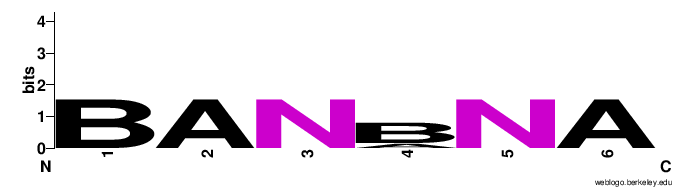

9\. Avez-vous réussi à trouver votre motif initial implanté en séquences? l'algorithme était-il rapide? Quelle est la complexité de chaque recherche de motif?

<br> Oui.</br>
<br> Oui.</br>
<br>O(n⁴)</br>

10\. Tester l'algorithme  suffix tree sur vos données de chipSeq. Puis générér le LOGO du motif trouvé

In [10]:
def readFasta(genome):
    sequence = []
    file = open(genome, "r")
    sequences = []
    seq = ""
    for s in file:
        if s[0] != ">":
            seq += s.strip().upper()
        else:
            sequences.append(seq)
            seq = ""
    return sequences[1:]
genome = "Sequence_by_Peaks_8.fasta"
sequences = readFasta(genome)
print(sequences)

['TGTAAACTTACCAGTAGATGGATTGGGCTTCCCGGTGAAACGCCCTATACTTGGCTGAGCTGTTGCCAAAAATCTTCTGGCATTCAATCTAAATGATCTGATTCCTAGCATTTTCCTTTCCTCTATACTAACGATACCCTTGTAAAAAATTTAACACTCCCTTGCTTCTTAGTCCAGGCCTAGTATCCTCTACACGCCAATCCTAAGAAAAAAAACCTCGAATTCCTCGATGCCCTTTTATACTTTTTTTTTTTCCATCCCTACTGGCTCCGGCAAGTCCTTCTCCCCCCTCCTCCCATCCTCCTACGGTTTGTCACACCGCCCACCGCCCAGGGGGATCCACTCAGTTATACAGCTAGCCCTTCCCCCCATCCCAATCTCCACAGACAAATACGCACAAACACCGACATCTCGGCTAGAACCACGAATCTCTCTCTTCCCACAATCCCCACAGACAAATAGCCGCACACCAAATGTCGCACGTTCATTGGCTCTTCTGCATCAGAATCTACACTTGACTCAGATCTTGTGCGGTTCCTTCTGAGCTCATCACCTAGAAAAGCTGATTTTCCCGAAATTGACACTTTTTTCTTCTCTCCTTGGATCCTGCTGCGGTCTTTCAGTGCAGACCGGTTTGCCCGTGTGAGTCTCGTTGTACGTCCGAGTTCTCGGTTTTTTACGAAACAAATCCCCTTCGGCTGCGCGGTTGCCTCGCGGTCCTCTCTGTGCCCTTTCTGGCTCTGCTTCCCAG', 'GACCCGCGACAGTGTGATACGCCGAATCCGCGAACTCGGCGTTTGCCTTCTCCGTTTCCTCAGTTGCTATGCACTTTGAACGTGATGGTCATGTGATTCGTTTTTAGTGTTCTGGAGAGAAAGTAGACAAGAAGCACATCATGTGATAGGGTCGTCTGTATTGTACTGTTATAACTTAGCATATCGCTAACGCTAGTAATTTCCGCTCACGGTGCTGCATTTTTAGGTTTGTGATATCTTAAA

In [11]:
st = construct_tree([sequences])
print(inexact_match(kmersValid, sequences, st, 2))

['AAACCCGG', 'AAACCCGT', 'AAACCCTG', 'AAACCCTT', 'AAACCGCT', 'AAACCGGC', 'AAACCGGG', 'AAACCGGT', 'AAACCGTC', 'AAACCGTG', 'AAACCGTT', 'AAACCTCG', 'AAACCTGC', 'AAACCTGG', 'AAACCTGT', 'AAACCTTC', 'AAACCTTG', 'AAACCTTT', 'AAACGCCG', 'AAACGCCT', 'AAACGCTC', 'AAACGCTG', 'AAACGCTT', 'AAACGGCC', 'AAACGGCG', 'AAACGGCT', 'AAACGGGC', 'AAACGGGT', 'AAACGGTC', 'AAACGGTG', 'AAACGGTT', 'AAACGTCC', 'AAACGTCG', 'AAACGTCT', 'AAACGTGC', 'AAACGTGG', 'AAACGTTC', 'AAACGTTG', 'AAACGTTT', 'AAACTCCG', 'AAACTCCT', 'AAACTCGC', 'AAACTCGG', 'AAACTCGT', 'AAACTGCC', 'AAACTGCG', 'AAACTGCT', 'AAACTGGC', 'AAACTGGG', 'AAACTGGT', 'AAACTGTC', 'AAACTGTT', 'AAACTTCC', 'AAACTTCG', 'AAACTTCT', 'AAACTTGC', 'AAACTTGG', 'AAACTTGT', 'AAACTTTC', 'AAACTTTG', 'AAAGCCCG', 'AAAGCCCT', 'AAAGCCGC', 'AAAGCCGG', 'AAAGCCGT', 'AAAGCCTC', 'AAAGCCTG', 'AAAGCCTT', 'AAAGCGGC', 'AAAGCGGT', 'AAAGCGTC', 'AAAGCGTG', 'AAAGCGTT', 'AAAGCTCC', 'AAAGCTCG', 'AAAGCTGC', 'AAAGCTGG', 'AAAGCTGT', 'AAAGCTTC', 'AAAGCTTG', 'AAAGCTTT', 'AAAGGCCC', 'AAAGGCCG', 'AA

MemoryError: 